# By: ADITYA SINGH
# The Sparks Foundation
# Data Science & Business Analytics Intern
# Task 1: Prediction using Supervised ML 

**Problem Statement : Predict the percentage of an student based on the no. of study hours.**

**Using the above prediction we have to find What will be predicted score if a student studies for 9.25 hrs/ day?**

**For this task we will be using Linear Regresssion.**

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
loc = "C:/Users/Aditya Singh/Downloads/student_scores.csv"
df = pd.read_csv(loc,header=0,index_col=None)

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Checking for the missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

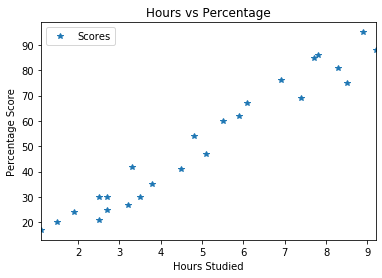

In [7]:
# Plotting Hours(x) vs Percentage(y)
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph we can clearly see that there is a positive linear relation between the number of hours studied and percentage scored.**

# Data Preparation

**In this step we will divide our data into X(Independent) and Y(Dependent).**

In [8]:
X= df.values[:,0:-1]
Y= df.values[:,-1]

**In the next we will split our data into training and testing using sklearn.model_selection train_test_split function.**

In [9]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=0)

# Building the model

**In this step we will train our Linear Regression model with the training data.**

In [10]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()

#train the model object
lm.fit(X_train,Y_train)

LinearRegression()

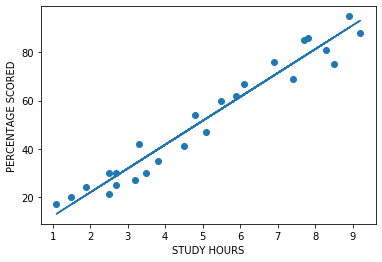

In [11]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.xlabel("STUDY HOURS")
plt.ylabel("PERCENTAGE SCORED")
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Model Prediction

**We have trained our model now we can make prediction using the test data.**

In [12]:
Y_pred = lm.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


# Model Evaluation

In [14]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#from sklearn import metrics  
import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R square:',r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print('Root Mean Square Error:',rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R square:',adjusted_r_squared)
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred)) 

R square: 0.9454906892105355
Root Mean Square Error: 4.647447612100367
Adjusted R square: 0.943120719176211
Mean Absolute Error: 4.183859899002975


In [15]:
# You can also test with your own data
hours = np.array(9.25)
hours = hours.reshape(-1,1)
pred = lm.predict(hours)
print('If the student studies for 9.25 hours, he or she is expected to score {}.'.format(pred[0]))

If the student studies for 9.25 hours, he or she is expected to score 93.69173248737535.
